# hyperbolic-tangent function
The hyperbolic-tangent function (also called the `tanh()`) function is defined as follows:

$$
\begin{align*}
\tanh(z) & = c_o \frac{\sinh(z)}{\cosh(z)} = c_o \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} \\

\newline
\text{where, } & z \in \mathbb{R} \\
& \sinh(z) = c_1 \frac{e^{z} - e^{-z}}{2} \text{, and } \cosh(z) = c_2 \frac{e^{z} + e^{-z}}{2} \\
& c_o, c_1, c_2 \in \mathbb{R}, \text{ and are usually equal to 1}
\end{align*}
$$

In this notebook we analyze how the hyperbolic-tangent function varies with its parameters:
 - [Varying $c_o$](#varying-c-o)

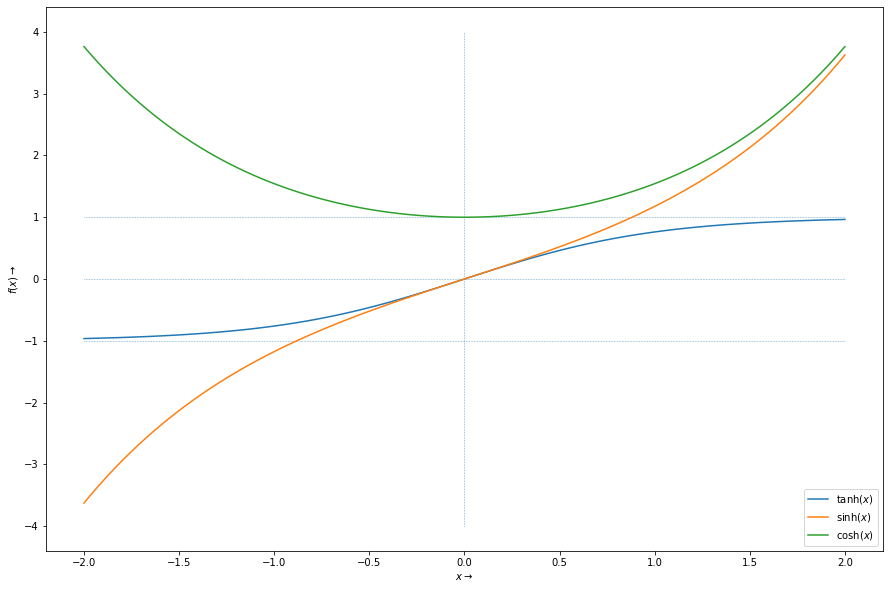

In [11]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(start=-2, stop=2, num=100)
def tanh(x, coeff=1):
    return coeff * (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def sinh(x, coeff=1):
    return coeff * (np.exp(x) - np.exp(-x)) / 2.0

def cosh(x, coeff=1):
    return coeff * (np.exp(x) + np.exp(-x)) / 2.0

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.plot(x, tanh(x), label="$\\tanh(x)$")
ax.plot(x, sinh(x), label="$\sinh(x)$")
ax.plot(x, cosh(x), label="$\cosh(x)$")

ax.hlines(y=0, xmin=np.amin(x), xmax=np.amax(x), linestyles="dotted", linewidths=0.6)
ax.hlines(y=1, xmin=np.amin(x), xmax=np.amax(x), linestyles="dotted", linewidths=0.6)
ax.hlines(y=-1, xmin=np.amin(x), xmax=np.amax(x), linestyles="dotted", linewidths=0.6)
ax.vlines(x=0, ymin=-4, ymax=4, linestyles="dotted", linewidths=0.6)

ax.set_ylabel("$f(x) \\rightarrow$")
ax.set_xlabel("$x \\rightarrow$")

plt.legend()
plt.show()

# # varying $c_o$

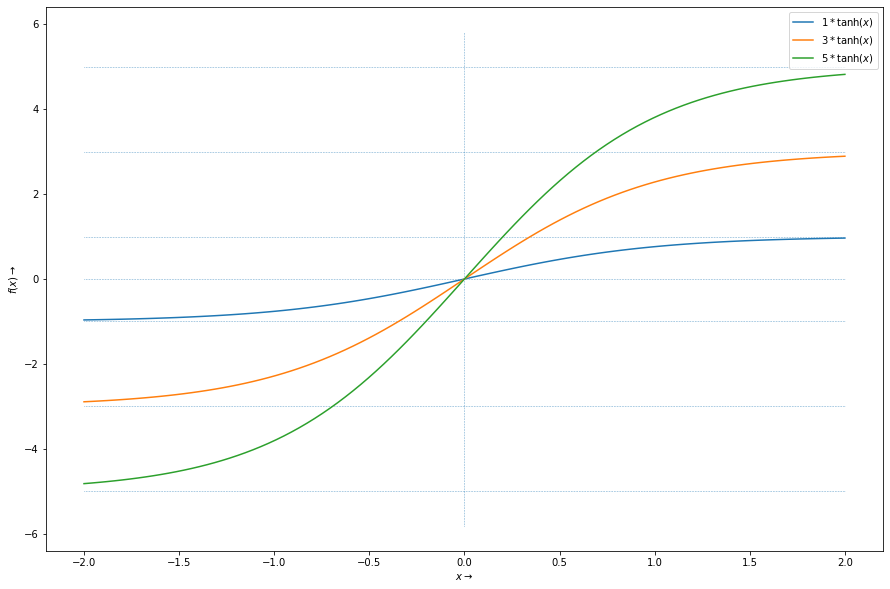

In [18]:
c_0 = np.array([1, 3, 5]).reshape((1, 3))
x = x.reshape((-1, 1))
htan = tanh(x, coeff=c_0)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.plot(x, htan[:, 0], label=f"${c_0[0, 0]} * \\tanh(x)$")
ax.plot(x, htan[:, 1], label=f"${c_0[0, 1]} * \\tanh(x)$")
ax.plot(x, htan[:, 2], label=f"${c_0[0, 2]} * \\tanh(x)$")

ax.hlines(y=0, xmin=np.amin(x), xmax=np.amax(x), linestyles="dotted", linewidths=0.6)
ax.hlines(y=c_0, xmin=np.amin(x), xmax=np.amax(x), linestyles="dotted", linewidths=0.6)
ax.hlines(y=-c_0, xmin=np.amin(x), xmax=np.amax(x), linestyles="dotted", linewidths=0.6)
ax.vlines(x=0, ymin=np.amin(htan) - 1, ymax=np.amax(htan) + 1, linestyles="dotted", linewidths=0.6)

ax.set_ylabel("$f(x) \\rightarrow$")
ax.set_xlabel("$x \\rightarrow$")

plt.legend()
plt.show()

## # derivatives

### # scalar-derivative
Let $x = \tanh(z)$, then we have

$$
\begin{align*}
\frac{\partial x}{\partial z} & = \frac{\partial \tanh(z)}{\partial z} \\
& = \frac{\partial\left(\frac{e^{2z}-1}{e^{2z}+1}\right)}{\partial z} \\
& = \frac{1}{e^{2z}+1} \frac{\partial (e^{2z}-1)}{\partial z} + (e^{2z}-1)\frac{\partial (e^{2z}+1)^{-1}}{\partial z} \\
& = \frac{2e^{2z}}{e^{2z}+1} - \frac{(e^{2z}-1)2e^{2z}}{(e^{2z}+1)^2} \\
& = \frac{4e^{2z}}{(e^{2z}+1)^2} \\
& = \left(1-\tanh(z)\right)\left(1+\tanh(z)\right) \\
& = 1 - \tanh^2(z) \\ 
\end{align*}
$$

### # vector-derivative
Let $\mathbf{x} = \tanh(\mathbf{z})$, where $\mathbf{x} = [x_1, x_2, \dots, x_n]^\intercal$, and $\mathbf{z} = [z_1, z_2, \dots, z_n]^\intercal$.

$$
\begin{align*}
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}\mathbf{z}} & = \begin{bmatrix}
\frac{\partial}{\partial z_1} & \frac{\partial}{\partial z_2} & \dots & \frac{\partial}{\partial z_n} \\
\end{bmatrix} \otimes \begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix} \\
& = \begin{bmatrix}
\frac{\partial x_1}{\partial z_1} & \frac{\partial x_1}{\partial z_2} & \dots & \frac{\partial x_1}{\partial z_n} \\
\frac{\partial x_2}{\partial z_1} & \frac{\partial x_2}{\partial z_2} & \dots & \frac{\partial x_2}{\partial z_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial x_n}{\partial z_1} & \frac{\partial x_n}{\partial z_2} & \dots & \frac{\partial x_n}{\partial z_n} \\
\end{bmatrix} \\
& = \begin{bmatrix}
1-\tanh^2(z_1) & 0 & \dots & 0 \\
0 & 1-\tanh^2(z_2) & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 1-\tanh^2(z_n) \\
\end{bmatrix} \\
& = \mathrm{I}_{n\times n} - \mathbf{x} \circ \mathbf{x} \circ \mathrm{I}_{n\times n}
\end{align*}
$$

where, we have (from the scalar-derivative)
$$
\begin{align*}
\frac{\partial x_i}{\partial z_i} & = \frac{\partial \tanh(z_i)}{\partial z_i} \\
& = 1 - \tanh^2(z_i) \qquad\forall i = 1,2,...,n\\ 
\end{align*}
$$